## EDA IN PYTHON
#### École d'ingénieurs Léonard de Vinci, La Défense, Paris
**Hugo Alatrista Salas** 

***

Exploratory Data Analysis (EDA) is an essential step in the data analytics process, where the primary goal is to summarize the main characteristics of a dataset and uncover patterns, anomalies, or relationships within the data before applying more complex modeling techniques. EDA helps analysts better understand the data using graphical and statistical methods. Key techniques used in EDA include:

Descriptive Statistics: Calculating summary statistics such as mean, median, mode, variance, and standard deviation to understand the central tendency and dispersion of the data.

Data Visualization: Creating visual representations like histograms, box plots, scatter plots, and heatmaps to spot trends, distributions, outliers, and correlations.

In this lab, we will use the concepts learned in class, such as centrality, dispersion, cluster, and correlation measures. Thus, we use a small data set and the **Pandas** and **Seaborn** libraries and a dataset called *Titanic*, which is widely used in forums and other sites (https://www.kaggle.com/datasets/yasserh/titanic-dataset). We will also use some essential visualization tools.

In [3]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#from google.colab import files # Please disable this comment if Google Collab is used.
#uploaded = files.upload() # Please disable this comment if Google Collab is used.
df = pd.read_csv("data/titanic.csv")

Pandas can help us summarize data. For example, we can use the **info()** method to display information about columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Mostramos los 5 primeros registros del dataframe
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Exercise 1

We want to show the last 15 rows of the dataframe

In [7]:
# Here your code

### Exercise 2

Now, we want to show 10 ramdom rows of our dataframe

In [8]:
# Here your code

## Measures of central tendency and dispersion

When performing Exploratory Data Analysis (EDA), measures of central tendency and dispersion are crucial for gaining insights into the structure and distribution of the data. Central tendency measures, such as the mean, median, and mode, help summarize the data by identifying a typical or central value representing the dataset. This is particularly useful for understanding a dataset's general behavior or average outcome. On the other hand, measures of dispersion, including variance, standard deviation, and interquartile range (IQR), provide insights into the spread or variability of the data. Dispersion metrics are important for identifying the degree of variation within the data, highlighting whether the data points are closely clustered or widely spread around the central value. 

Pandas help us by showing a resume of the key metrics from a date set. It can be used for the whole dataframe and by a column.

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

If we want to get the mode of discrete data, we can use **mode()**. In this example, we will use the *Sex* attribute.

In [11]:
df.Sex.mode() # We can use this format to reference a feature/column of a dataset

0    male
Name: Sex, dtype: object

### Exercise 3

We want to know if there were more deaths or survivors in the Titanic accident. Use the mode measure for this.

In [12]:
# Here your code


### Exercise 4

We must now implement a function that, given an attribute or column, gives us all the metrics shown by the *describe()* method. Pandas instructions, such as min(), max(), etc., must be used. In addition, the function must validate whether the column sent as a parameter is of the numeric type. If the column is not numeric but discrete, it only shows us the mode metric.

In [13]:
# Here your code


In [14]:
# Test your code here


## Functions to measure the relationship between variables

We can now measure the relationship between pairs of variables in a data set. In this lab section, we will calculate correlation and covariance. We will begin to measure the correlation between two attributes of our data set.

In [15]:
df["Age"].corr(df["Parch"])

-0.18911926263203516

We can also calculate the correlation between each pair of numerical attributes in our dataset. Pay attention to features to be correlated. They will be numeric values and their comparison should make sense. 

In [16]:
df[["Survived", "Pclass", "Age", "SibSp", "Fare"]].corr()


,Survived,Pclass,Age,SibSp,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.159651
Fare,0.257307,-0.549500,0.096067,0.159651,1.000000


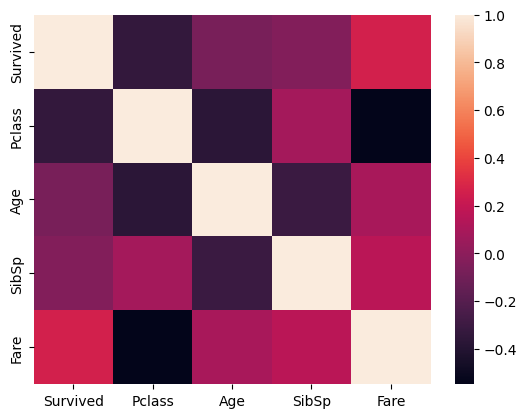

In [17]:
import seaborn as sn
corrMatrix = df[["Survived", "Pclass", "Age", "SibSp", "Fare"]].corr()
sn.heatmap(corrMatrix)
plt.show()

Covariance is a statistical measure that indicates the direction of the linear relationship between two variables. In data analytics, it helps determine whether two variables tend to increase or decrease together (positive covariance) or move inversely (negative covariance). Covariance helps understand the correlation and dependencies between variables, which is crucial in identifying relationships and trends within datasets.

In [18]:
df[["Survived", "Pclass", "Age", "SibSp", "Fare"]].cov()

,Survived,Pclass,Age,SibSp,Fare
Survived,0.236772,-0.137703,-0.551296,-0.018954,6.221787
Pclass,-0.137703,0.699015,-4.496004,0.076599,-22.830196
Age,-0.551296,-4.496004,211.019125,-4.163334,73.849030
SibSp,-0.018954,0.076599,-4.163334,1.216043,8.748734
Fare,6.221787,-22.830196,73.849030,8.748734,2469.436846


In the table above, a positive covariance value shows that high values ​​of one of the variables usually correspond mostly to high values ​​of the other variable (or for small values ​​of one variable to small values ​​of the other). Conversely, the covariance is negative if high values ​​of one variable usually correspond mostly to lower values ​​of the other variable. Finally, we made the same mistake as in the previous exercise. We used categorical data that can take on one of a limited and usually fixed number of possible values.

## EDA automatization

Several tools have been proposed to implement the largest number of methods that integrate EDA (including visualization). For example, we have **Autoviz** (https://github.com/AutoViML/AutoViz), **D-Tale**(https://github.com/man-group/dtale), **Pandas profiling** (https://github.com/pandas-profiling/pandas-profiling/) or **Sweetviz** (https://github.com/fbdesignpro/sweetviz). In this lab we will quickly see the last one.

### Sweetviz

Another automation tool is **Sweetviz**. This tool is installed using *pip install sweetviz*. Then, we use one of the three Sweetviz options.

1) Analysis: This function analyzes the dataset and returns us an exploratory data analysis report.

2) Comparison: This function allows us to compare two datasets. All visualization charts and analysis reports will be generated by comparing them.

3) Conditional Comparison: This function compares by splitting the dataset into two or more subpopulations.

For more information about the tool and its parameterization, you can visit https://github.com/fbdesignpro/sweetviz

In [19]:
#!pip install sweetviz # Please disable this comment if Google Collab is used. It will be used once.
import sweetviz as sv
import pandas as pd

ModuleNotFoundError: No module named 'sweetviz'

In [ ]:
reporte = sv.analyze(df)

In [ ]:
reporte.show_notebook() 
# View the report in the Notebook. Other output options are available (e.g., reporte.show_html())

### Exercise 6

Implement a function that calculates the Trimmed mean measure. This function must have as parameters a column or feature of a dataframe and an integer that represents the replacements of the extreme values ​​of the data (equivalent to the percentage in the course slides). In addition, the function should send a warning message if the feature does not contain numeric values. To test your function, you will find a data set associated with the quality of red wines. First, recover the dataset and store it in a dataframe. Then, apply the function to all numeric columns in the daraframe. Once the trimmed mean was calculated for each column, compare them with the classical mean value. To do that, we can use a for loop to obtain these results. Are they similar? Which conclusion - regarding the outliers detection - can we get from these two values? Discuss your results. 

In [20]:
# Here your code ()

def trimmed_mean():
    pass

In [ ]:
# Here your code (for loop)


In [24]:
# Here your interpretation


### Challenge 1

The interpretation of the difference ​​between the trimmed and classical mean can take on several directions. Validate or refute your answer using data on wine quality and earthquakes (magnitude and depth). To this aim, two well-known techniques for outlier detection can be used: 1) z-score, which we have implemented in a previous lab, and 2) the Isolation Forest algorithm from sklearn. Finally, write a paragraph discussing your result.

In [25]:
# Here you code (Z-Score or the instaciation of your class)


In [ ]:
# Here your code (Isolation Forest)
